In [1]:
# Step 2: Import libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
# Step 3: Define restaurant categories

restaurant_types = [
    "Fast Food",
    "Indian",
    "Chinese",
    "Pizza",
    "Cafe",
    "Fine Dining",
    "Takeaway",
    "Street Food"
]

locations = [
    "Stockport",
    "Manchester City Centre",
    "Greater Manchester",
    "London",
    "Birmingham",
    "Liverpool",
    "Leeds",
    "UK Other"
]

customer_demographics = [
    "Students",
    "Families",
    "Office Workers",
    "Tourists",
    "Low Income",
    "High Income",
    "Mixed"
]


In [3]:
# Step 4: Generate restaurant names

def generate_restaurant_name():
    prefix = ["Royal", "Golden", "Urban", "Elite", "Street", "Metro", "Taste", "City"]
    suffix = ["Grill", "Kitchen", "Bites", "Cafe", "House", "Express", "Corner", "Palace"]
    
    return random.choice(prefix) + " " + random.choice(suffix)


In [4]:
# Step 5: Combo deals generator

def generate_combo():
    
    combos = [
        "Burger + Fries + Drink",
        "Pizza + Drink",
        "Chicken Box + Drink",
        "Family Meal Deal",
        "Lunch Combo",
        "Student Deal",
        "Dinner Special",
        "Weekend Combo"
    ]
    
    return random.choice(combos)


In [5]:
# Step 6: Create dataset

data = []

for i in range(300):  # 300 restaurants
    
    customers_per_day = random.randint(50, 500)
    
    avg_menu_price = round(random.uniform(5, 25), 2)
    
    daily_revenue = customers_per_day * avg_menu_price
    
    weekly_revenue = daily_revenue * 7
    
    yearly_revenue = daily_revenue * 365
    
    profit_margin = random.uniform(0.03, 0.075)  # UK average
    
    weekly_profit = weekly_revenue * profit_margin
    
    yearly_profit = yearly_revenue * profit_margin
    
    data.append({
        
        "Restaurant Name": generate_restaurant_name(),
        "Location": random.choice(locations),
        "Type": random.choice(restaurant_types),
        "Combo Deal": generate_combo(),
        "Demographic": random.choice(customer_demographics),
        
        "Customers Per Day": customers_per_day,
        
        "Average Menu Price (£)": avg_menu_price,
        
        "Weekly Revenue (£)": round(weekly_revenue, 2),
        
        "Yearly Revenue (£)": round(yearly_revenue, 2),
        
        "Weekly Profit (£)": round(weekly_profit, 2),
        
        "Yearly Profit (£)": round(yearly_profit, 2)
        
    })

df = pd.DataFrame(data)

df.head()


,Restaurant Name,Location,Type,Combo Deal,Demographic,Customers Per Day,Average Menu Price (£),Weekly Revenue (£),Yearly Revenue (£),Weekly Profit (£),Yearly Profit (£)
0,Taste Express,Birmingham,Pizza,Burger + Fries + Drink,Low Income,304,21.07,44836.96,2337927.2,2151.37,112178.55
1,Royal Kitchen,Leeds,Cafe,Weekend Combo,Low Income,426,23.41,69808.62,3640020.9,4583.46,238994.56
2,Royal Grill,Liverpool,Street Food,Burger + Fries + Drink,Office Workers,412,10.98,31666.32,1651172.4,1537.22,80154.91
3,Royal House,Stockport,Cafe,Family Meal Deal,Mixed,383,16.42,44022.02,2295433.9,3162.18,164884.87
4,Elite Grill,Stockport,Street Food,Lunch Combo,Families,322,12.94,29166.76,1520838.2,1663.06,86716.83


In [6]:
df


,Restaurant Name,Location,Type,Combo Deal,Demographic,Customers Per Day,Average Menu Price (£),Weekly Revenue (£),Yearly Revenue (£),Weekly Profit (£),Yearly Profit (£)
0,Taste Express,Birmingham,Pizza,Burger + Fries + Drink,Low Income,304,21.07,44836.96,2337927.20,2151.37,112178.55
1,Royal Kitchen,Leeds,Cafe,Weekend Combo,Low Income,426,23.41,69808.62,3640020.90,4583.46,238994.56
2,Royal Grill,Liverpool,Street Food,Burger + Fries + Drink,Office Workers,412,10.98,31666.32,1651172.40,1537.22,80154.91
3,Royal House,Stockport,Cafe,Family Meal Deal,Mixed,383,16.42,44022.02,2295433.90,3162.18,164884.87
4,Elite Grill,Stockport,Street Food,Lunch Combo,Families,322,12.94,29166.76,1520838.20,1663.06,86716.83
...,...,...,...,...,...,...,...,...,...,...,...
295,Taste Cafe,Leeds,Fast Food,Weekend Combo,Families,346,19.40,46986.80,2450026.00,2513.15,131042.76
296,City Palace,Stockport,Indian,Student Deal,Tourists,424,24.38,72359.84,3773048.80,2586.78,134882.05
297,Golden Palace,Manchester City Centre,Fine Dining,Pizza + Drink,Tourists,361,23.38,59081.26,3080665.70,1892.59,98685.26
298,Taste Kitchen,Birmingham,Chinese,Dinner Special,Low Income,221,7.43,11494.21,599340.95,486.66,25375.67


In [7]:
df.to_csv("manchester_restaurants_dataset.csv", index=False)


In [8]:
profit_by_location = df.groupby("Location")["Yearly Profit (£)"].mean()

profit_by_location


Location
Birmingham                92991.322258
Greater Manchester        67608.123226
Leeds                     71279.774444
Liverpool                 85129.827500
London                    76595.266562
Manchester City Centre    73111.357083
Stockport                 85262.730244
UK Other                  82786.251778
Name: Yearly Profit (£), dtype: float64

In [9]:
profit_by_type = df.groupby("Type")["Yearly Profit (£)"].mean()

profit_by_type


Type
Cafe            75311.415263
Chinese         85578.801316
Fast Food       61944.495641
Fine Dining     65423.015429
Indian          79059.197241
Pizza          101116.550588
Street Food     88880.706000
Takeaway        78414.864681
Name: Yearly Profit (£), dtype: float64

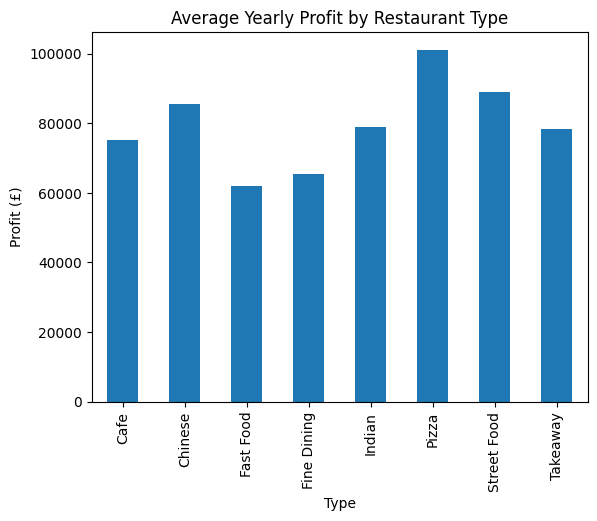

In [10]:
profit_by_type.plot(kind="bar")

plt.title("Average Yearly Profit by Restaurant Type")

plt.ylabel("Profit (£)")

plt.show()


In [11]:
combo_profit = df.groupby("Combo Deal")["Yearly Profit (£)"].mean()

combo_profit


Combo Deal
Burger + Fries + Drink    75954.406512
Chicken Box + Drink       84991.958108
Dinner Special            67753.769118
Family Meal Deal          85985.680000
Lunch Combo               66663.384167
Pizza + Drink             76521.949070
Student Deal              80016.098182
Weekend Combo             99572.756970
Name: Yearly Profit (£), dtype: float64

In [12]:
demographic_profit = df.groupby("Demographic")["Yearly Profit (£)"].mean()

demographic_profit


Demographic
Families          80457.724706
High Income       75935.753784
Low Income        72083.618140
Mixed             80457.346222
Office Workers    73802.650465
Students          90828.854595
Tourists          82353.427727
Name: Yearly Profit (£), dtype: float64

In [13]:
df.sort_values(by="Yearly Profit (£)", ascending=False).head(10)


,Restaurant Name,Location,Type,Combo Deal,Demographic,Customers Per Day,Average Menu Price (£),Weekly Revenue (£),Yearly Revenue (£),Weekly Profit (£),Yearly Profit (£)
267,Metro Bites,Birmingham,Chinese,Student Deal,Students,415,23.20,67396.00,3514220.00,5036.32,262608.03
165,Urban Corner,UK Other,Cafe,Weekend Combo,Tourists,490,22.61,77552.30,4043798.50,4869.19,253893.62
54,Metro Express,Leeds,Fast Food,Student Deal,Office Workers,478,20.37,68158.02,3553953.90,4742.01,247261.94
150,Taste Cafe,Liverpool,Fine Dining,Burger + Fries + Drink,Families,433,21.23,64348.13,3355295.35,4730.01,246636.17
139,Taste Kitchen,UK Other,Street Food,Pizza + Drink,Tourists,399,24.76,69154.68,3605922.60,4689.01,244498.35
1,Royal Kitchen,Leeds,Cafe,Weekend Combo,Low Income,426,23.41,69808.62,3640020.90,4583.46,238994.56
124,City Cafe,Birmingham,Pizza,Family Meal Deal,Students,450,22.49,70843.50,3693982.50,4581.75,238905.78
89,Elite Express,Manchester City Centre,Takeaway,Burger + Fries + Drink,Mixed,465,22.30,72586.50,3784867.50,4329.98,225777.55
27,Taste Palace,Stockport,Pizza,Weekend Combo,Families,446,18.71,58412.62,3045800.90,3951.11,206021.96
16,Taste Cafe,UK Other,Street Food,Student Deal,Mixed,402,19.47,54788.58,2856833.10,3883.40,202491.44
